# Business Problem:

'ABC' flower company is finding difficult to classify flowers that are grown in their garden based on their:
  1. sepal_length_cm
  2. sepal_width_cm
  3. petal_length_cm
  4. petal_width_cm
  
  
# Information from domain experts

1. There will be ouliers in the dataset.
2. Flowers names are not populated properly all the time.
3. Some data are in unit 'm' while the standard unit is 'cm'.

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

In [26]:
data_df = pd.read_csv('iris-data.csv')

# 1. Exploring the data structure

## 1.1 Take a look at the dataset

In [27]:
data_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 1.2 Get description of data

In [28]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     145 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


From the above observation, it can be seen that,
1. There are 150 total entries. Each data point has 4 features and 1 class which is to be predicted.
2. Out of 150 total entries, there are 5 entries in petal_width_cm whose value is not known.

## 1.3 Summary of data

In [29]:
data_df.describe(include='all')

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
count,150.000000,150.000000,150.000000,145.000000,150
unique,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.644627,4.572667,3.758667,1.236552,NaN
std,1.312781,18.534553,1.764420,0.755058,NaN
min,0.055000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.400000,NaN
50%,5.700000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


Summary of the numerical values. Summary includes obtaining mean, standard deviation, minimum and maximim value.

# 2. Data Cleaning

## 2.1  Drop datapoints with 'NA' 

In [30]:
data_na = data_df.dropna(subset=["petal_width_cm"])

In [31]:
data_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    145 non-null float64
sepal_width_cm     145 non-null float64
petal_length_cm    145 non-null float64
petal_width_cm     145 non-null float64
class              145 non-null object
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


## 2.2 Explore categorical data

In [32]:
data_na['class'].value_counts()

Iris-virginica     50
Iris-versicolor    45
Iris-setosa        44
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

#### Can you spot the error????

1. For 5 data points 'Iris-versicolor' has been specified as 'versicolor' 
2. For 1 data points, 'Iris-setosa' has been specified as 'Iris-setossa'

In [33]:
data_na['class'].replace(["Iris-setossa","versicolor"], ["Iris-setosa","Iris-versicolor"], inplace=True)
data_na['class'].value_counts()

/Users/saishruthi.tn@ibm.com/anaconda3/envs/cp/lib/python3.7/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Iris-versicolor    50
Iris-virginica     50
Iris-setosa        45
Name: class, dtype: int64

## 2.3 Outlier detection

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114f73a20>,
      dtype=object)

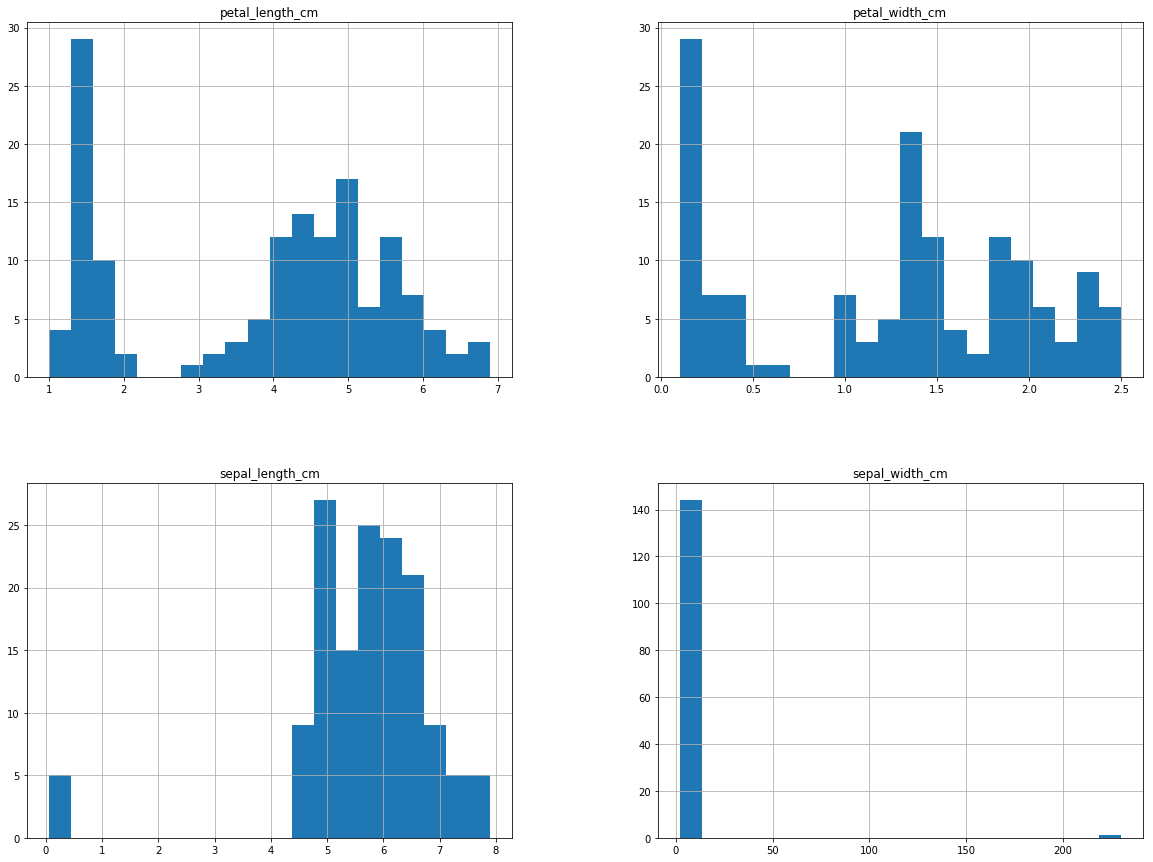

In [41]:
data_na.hist( bins=20, figsize=(20,15))

From the above plot it is evident that there is some outlier in 'sepal_width_cm' feature. Removing data points whose 'sepal_width_cm' is more tha 50.

In [49]:
remove_outlier_data = data_na.drop(data_na[(data_na.sepal_width_cm > 50)].index)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116cd4550>,
      dtype=object)

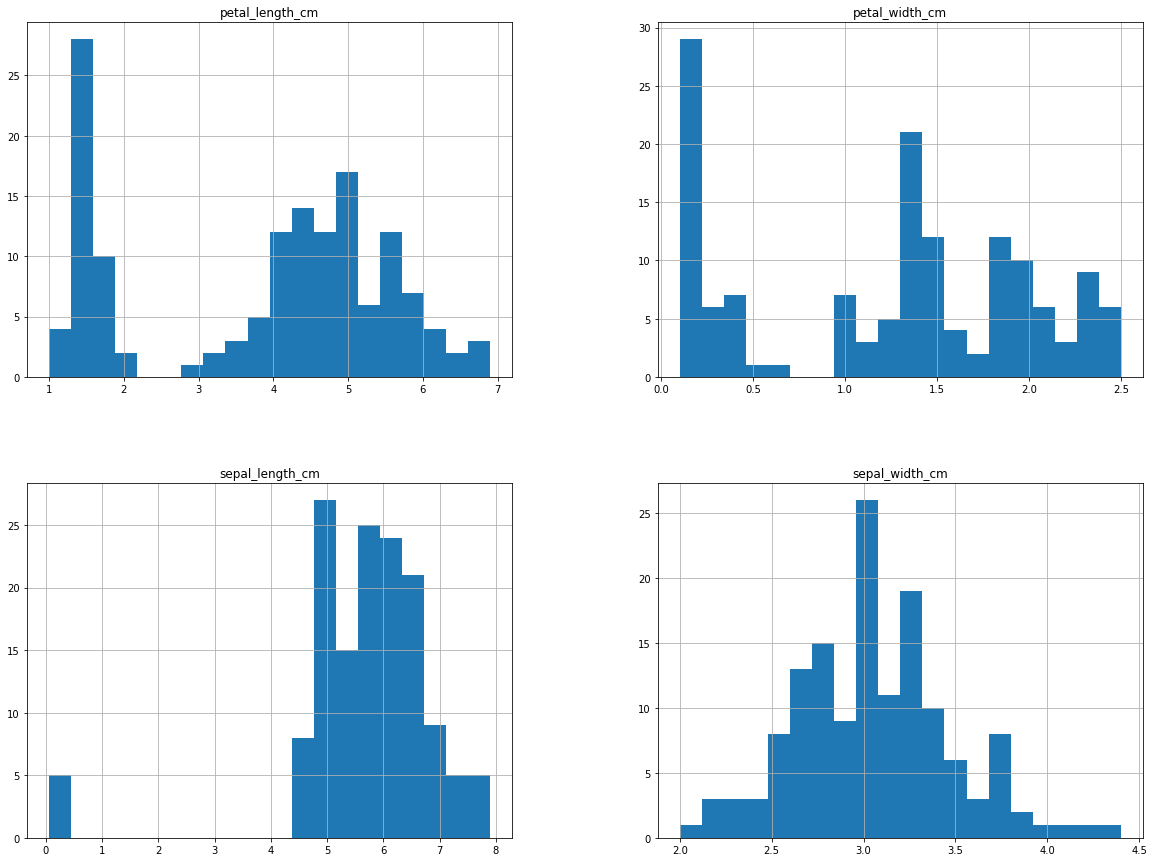

In [50]:
remove_outlier_data.hist(bins=20, figsize=(20,15))

## 2.4 Converting datapoints from unit 'm' to 'cm'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117ad9358>]],
      dtype=object)

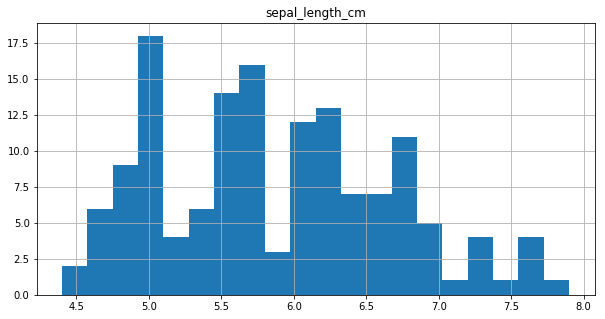

In [51]:
remove_outlier_data.loc[remove_outlier_data.sepal_length_cm < 1, ['sepal_length_cm']] = remove_outlier_data['sepal_length_cm']*100
remove_outlier_data.hist(column = 'sepal_length_cm',bins=20, figsize=(10,5))

## 2.5 Handling categorical variable

In [76]:
data_encoded = remove_outlier_data.copy(deep=True)
data_cleaned = pd.get_dummies(data_encoded)

In [77]:
data_cleaned.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


# 3. Visualization

## 3.1 Get correlation between features

In [84]:
corr_matrix = data_encoded.corr()
corr_matrix

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,-0.114922,0.842276,0.794680
sepal_width_cm,-0.114922,1.000000,-0.437127,-0.369126
petal_length_cm,0.842276,-0.437127,1.000000,0.958568
petal_width_cm,0.794680,-0.369126,0.958568,1.000000


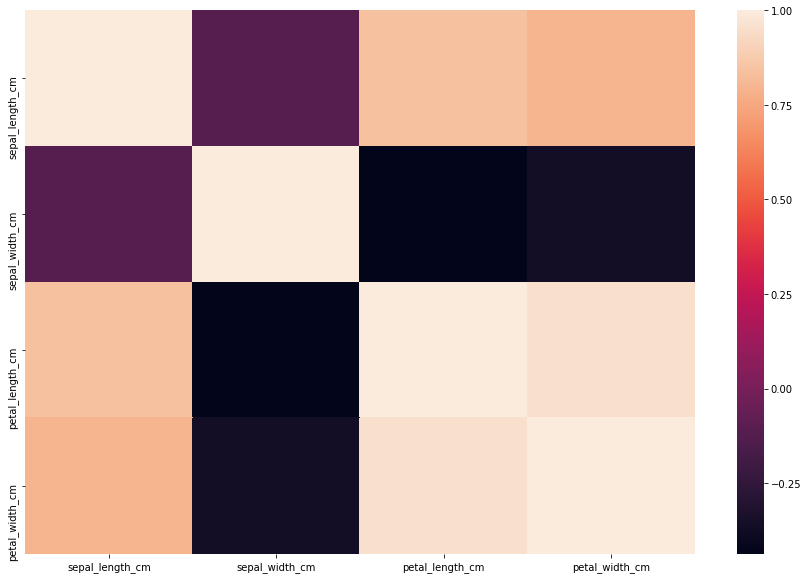

In [89]:
plt.rcParams["figure.figsize"] = [15,10]
sns.heatmap(corr_matrix,xticklabels=corr_matrix.columns,yticklabels=corr_matrix.columns)

## 3.2  Scatter Plot
It is plotted between each feature against the other. Distribution of the data is can be clearly obtained using the scatter plot. It can be inferred from the scatter plot that data can be linearly seperated.

/Users/saishruthi.tn@ibm.com/anaconda3/envs/cp/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c614860>,
      dtype=object)

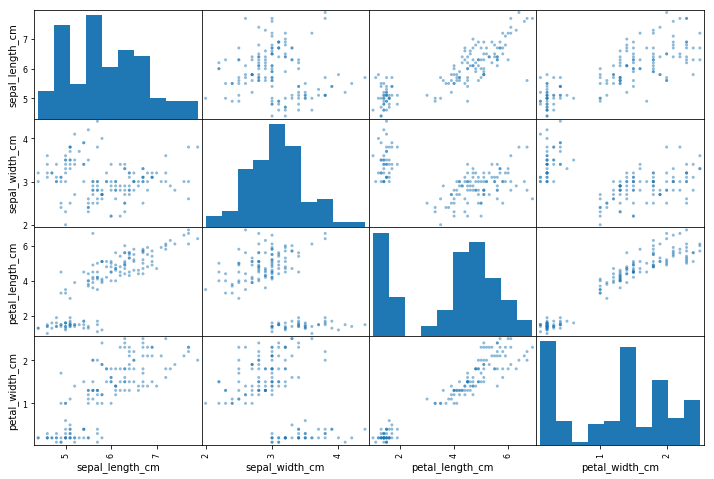

In [91]:
scatter_matrix(data_encoded, figsize=(12, 8))

In [92]:
data_versicolor = data_encoded.loc[data_encoded['class'] == 'Iris-versicolor']

In [93]:
data_versicolor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 50 to 99
Data columns (total 5 columns):
sepal_length_cm    50 non-null float64
sepal_width_cm     50 non-null float64
petal_length_cm    50 non-null float64
petal_width_cm     50 non-null float64
class              50 non-null object
dtypes: float64(4), object(1)
memory usage: 2.3+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cd0b828>,
      dtype=object)

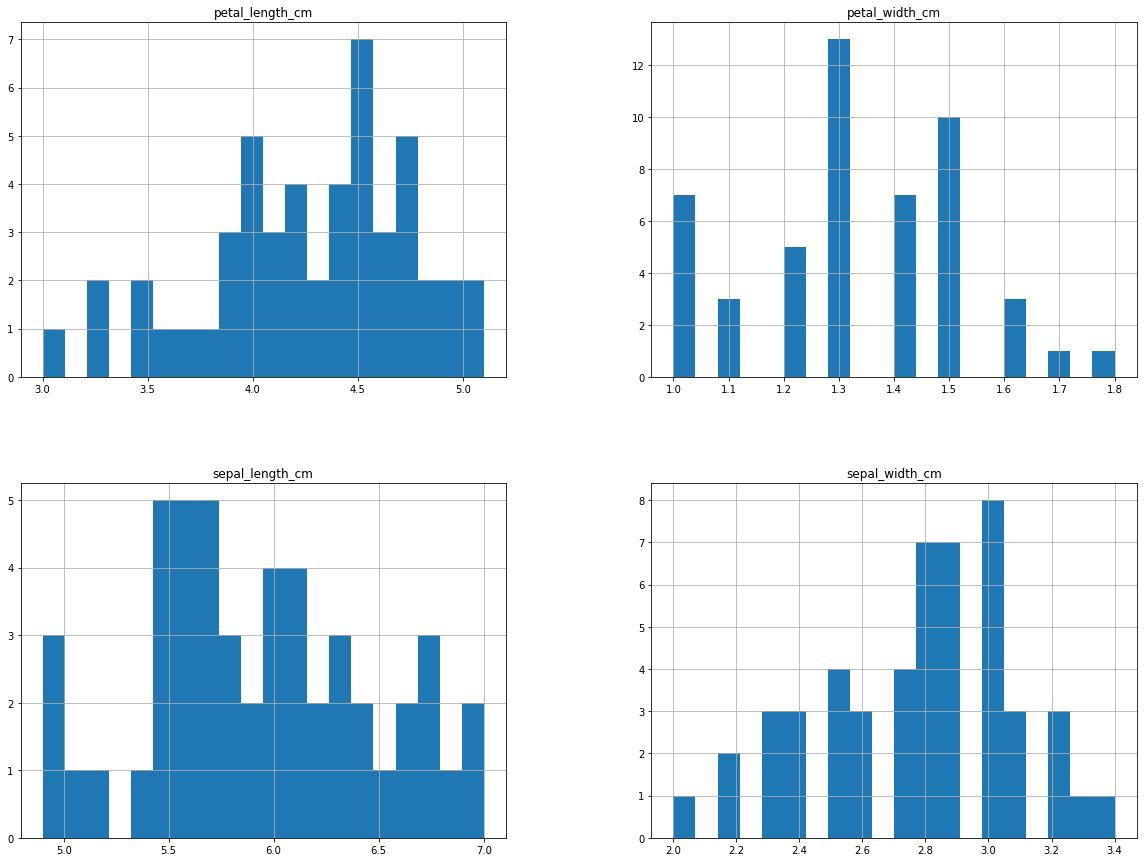

In [94]:
data_versicolor.hist( bins=20, figsize=(20,15))

In [95]:
data_setosa = data_encoded.loc[data_encoded['class'] == 'Iris-setosa']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cd0b160>,
      dtype=object)

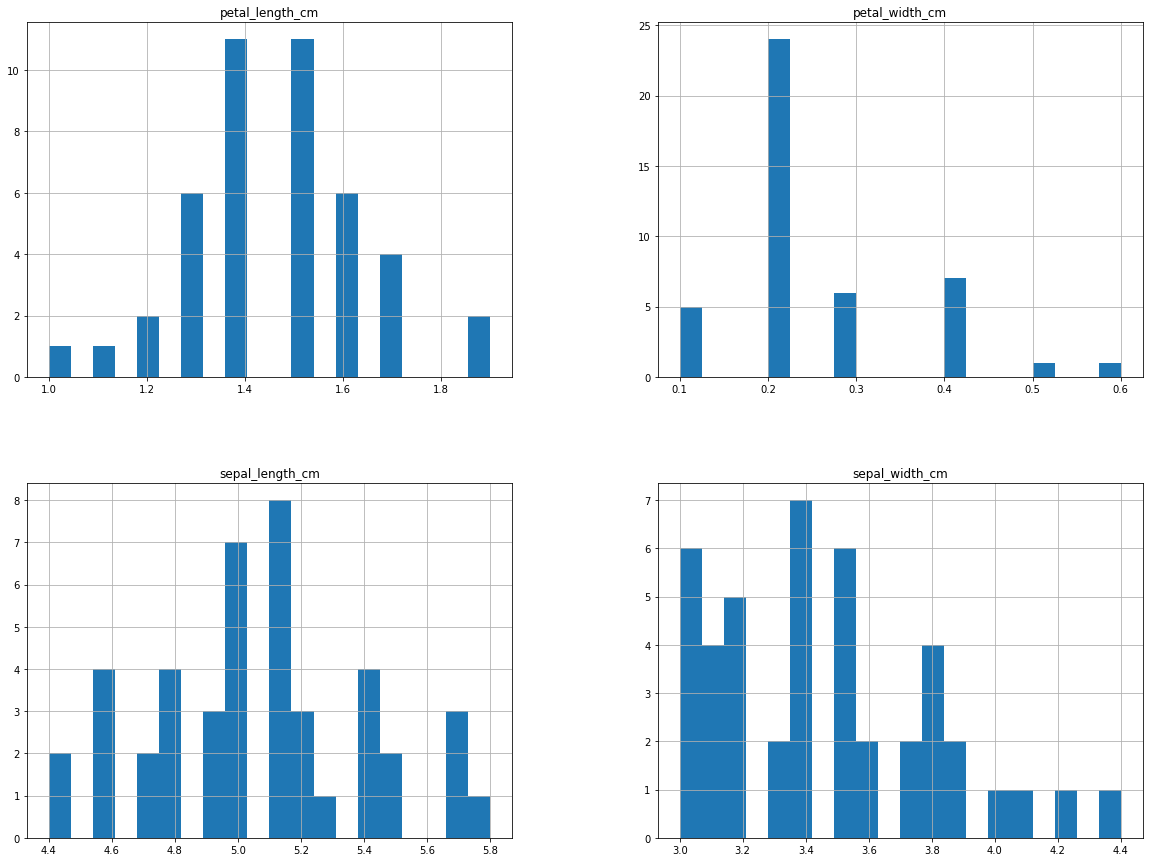

In [96]:
data_setosa.hist( bins=20, figsize=(20,15))

In [97]:
data_virginica  = data_encoded.loc[data_encoded['class'] == 'Iris-virginica']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cead3c8>,
      dtype=object)

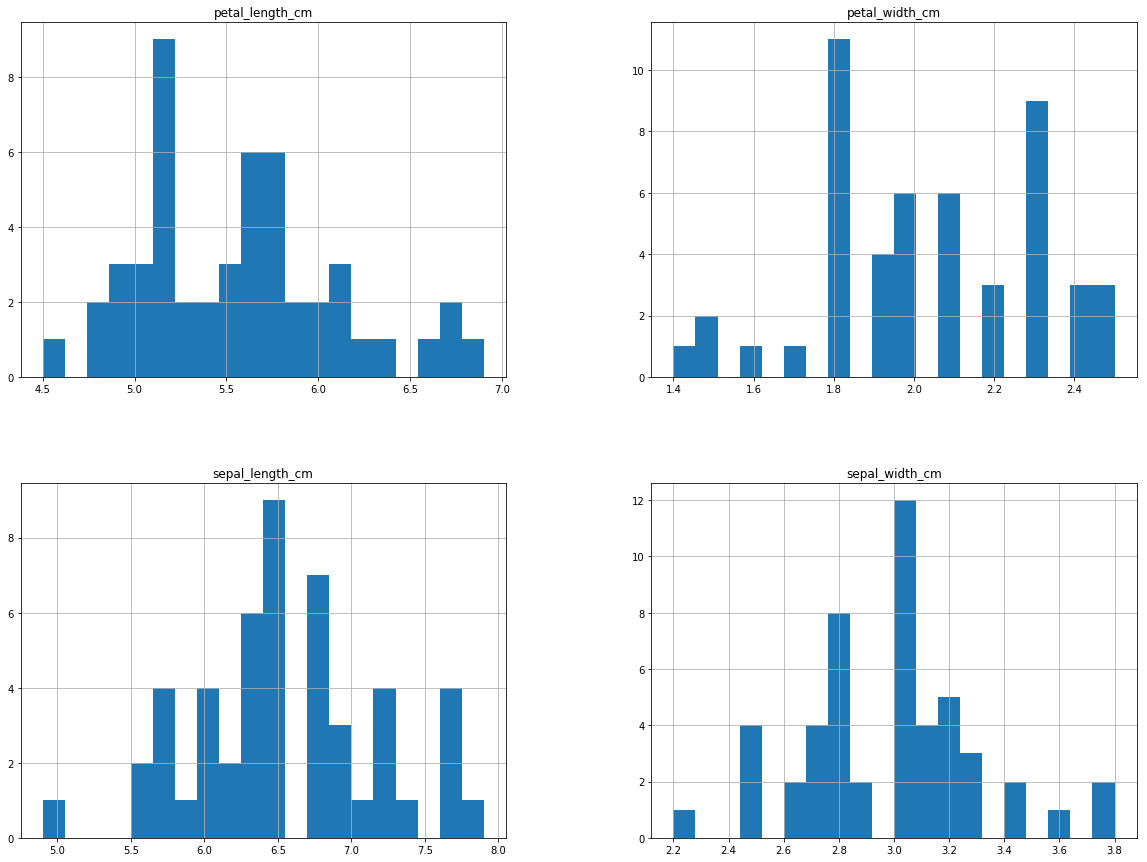

In [98]:
data_virginica.hist( bins=20, figsize=(20,15))